In [55]:
import numpy as np
import matplotlib.pyplot as plt

Plot omega(n).

In [30]:
def IntFun0n(n, spect):
    
    ct1 = spect[0][0]
    ct2 = spect[0][1]
    
    return spect[1]*(-np.log( (1-ct1*n)/(1-ct2*n)  ) ) /n;
    
    
def IntFun1n(n, spect):
    
    ct1 = spect[0][0]
    ct2 = spect[0][1]

    return spect[1] * ((-ct1+ct2) + np.log(  (ct2*n-1)/(ct1*n-1)  ) /n)/n


def IntFun2n(n, spect):
    
    ct1 = spect[0][0]
    ct2 = spect[0][1]

    return spect[1] * (-(ct1-ct2) * ( (ct1+ct2) +2/n) + 2 * np.log(  (ct2 * n-1)/(ct1 * n-1) ) /n**2)/(2 * n);

In [53]:
def ConAxialSymOmegaNMZA(n,spectra):
    
    i0mzaM = np.sum( np.array( [ IntFun0n(n, spect) for spect in spectra ] ) )
    i2mzaM = np.sum( np.array( [ IntFun2n(n, spect) for spect in spectra ] ) )
    i1mzaM = np.sum( np.array( [ IntFun1n(n, spect) for spect in spectra ] ) )
  
    return  np.array([ ( i0mzaM - i2mzaM + np.sqrt( ( i0mzaM + i2mzaM - 2*i1mzaM ) * ( i0mzaM + i2mzaM + 2*i1mzaM ) )  )/(-4) ,\
                       ( i0mzaM - i2mzaM - np.sqrt( ( i0mzaM + i2mzaM - 2*i1mzaM ) * ( i0mzaM + i2mzaM + 2*i1mzaM ) )  )/(-4) ])


Now feed in the array of spectrum
{{{0.9, 0.6}, 3}, {{0.6, 0.3}, -3}}

In [32]:
spectStepLike = np.array( [ [ [0.9, 0.6], 3], [ [0.6, 0.3], -3 ] ] )

In [33]:
spectStepLike[[0]]

array([[[0.9, 0.6], 3]], dtype=object)

In [34]:
IntFun0n(0.4,spectStepLike[0])

1.2888769269499456

In [54]:
ConAxialSymOmegaNMZA(10, spectStepLike)

array([-0.06610183, -0.01367181])

In [72]:
nArray = np.linspace( -6, 5, 1000 )

In [73]:
omegaArray = np.array([ ConAxialSymOmegaNMZA( n, spectStepLike ) for n in nArray ])
print omegaArray

[[ 0.02409296  0.0388017 ]
 [ 0.02414653  0.03882435]
 [ 0.02420038  0.0388469 ]
 ..., 
 [-0.23941022 -0.02841249]
 [-0.23810158 -0.02834439]
 [-0.23680681 -0.02827662]]


/Users/leima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
/Users/leima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log
/Users/leima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in log
/Users/leima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log


In [74]:
np.transpose(omegaArray)[0] 

array([ 0.02409296,  0.02414653,  0.02420038,  0.02425453,  0.02430897,
        0.02436372,  0.02441877,  0.02447413,  0.0245298 ,  0.02458578,
        0.02464208,  0.0246987 ,  0.02475565,  0.02481292,  0.02487053,
        0.02492847,  0.02498676,  0.02504539,  0.02510436,  0.02516369,
        0.02522338,  0.02528343,  0.02534384,  0.02540463,  0.02546579,
        0.02552733,  0.02558925,  0.02565157,  0.02571428,  0.02577739,
        0.0258409 ,  0.02590483,  0.02596917,  0.02603394,  0.02609914,
        0.02616477,  0.02623084,  0.02629736,  0.02636433,  0.02643177,
        0.02649967,  0.02656804,  0.0266369 ,  0.02670625,  0.0267761 ,
        0.02684645,  0.02691731,  0.0269887 ,  0.02706062,  0.02713307,
        0.02720608,  0.02727964,  0.02735378,  0.02742849,  0.02750379,
        0.02757969,  0.0276562 ,  0.02773333,  0.0278111 ,  0.02788952,
        0.0279686 ,  0.02804835,  0.02812878,  0.02820992,  0.02829178,
        0.02837437,  0.0284577 ,  0.02854181,  0.02862669,  0.02

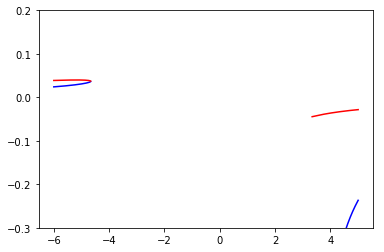

In [78]:
plt.plot( nArray, np.transpose(omegaArray)[0], 'b' , nArray, np.transpose(omegaArray)[1], 'r' )
plt.ylim([-0.3,0.2])
plt.show()